## Add scripts to the path

In [1]:

import os, sys

current_dir = os.getcwd()
print(current_dir)

# Get the parent directory
parent_dir = os.path.dirname(current_dir)

scripts_path = os.path.join(parent_dir, 'scripts')

# Insert the path to the parent directory
sys.path.insert(0, parent_dir)

# Insert the path to the Scripts directory
sys.path.insert(0, scripts_path)

# Add the parent directory to the Python path
sys.path.append(os.path.abspath(os.path.join('..')))

d:\Applications\mini-project\notebooks


## Import statements

In [2]:
from scripts.feature_engineering import clean_review, vectorize_reviews, convert_sentiment_to_binary

[nltk_data] Downloading package stopwords to C:\Users\VICTUS
[nltk_data]     16\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

## Load the dataset

In [4]:
PATH = "../data/IMDB Dataset.csv"
df = pd.read_csv(PATH)

## Start Cleaning and Feature Engineering

Pass the dataset through the feature engineering functions

In [5]:
# Convert sentiment to binary
df = convert_sentiment_to_binary(df)

# Clean the reviews
df['clean_review'] = df['review'].astype(str).apply(clean_review)

# Vecotrize the reviews
X = vectorize_reviews(df['clean_review'], path_tfidf='../models/tfidf_vectorizer.pkl')

Obtain the y value

In [6]:
y = df['label']

Create a train-test split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Train a logistic regression model

In [8]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


Evaluate the model

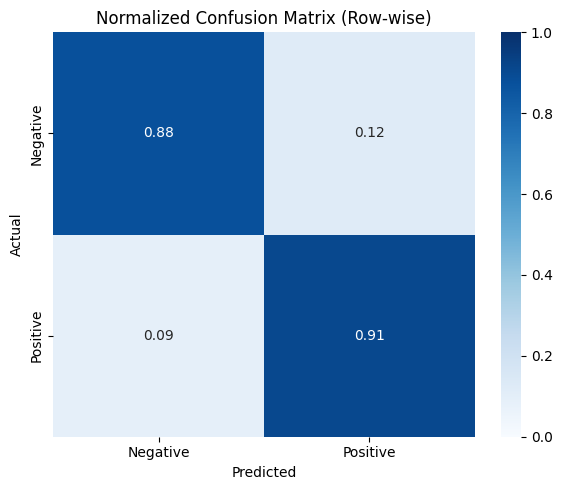

Classification Report:

              precision    recall  f1-score   support

    Negative       0.91      0.88      0.89      4961
    Positive       0.88      0.91      0.90      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Predict
y_pred = model.predict(X_test)

# Compute normalized confusion matrix
cm = confusion_matrix(y_test, y_pred, normalize='true')
labels = ['Negative', 'Positive']

# Plot heatmap with values between 0 and 1
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='.2f', cmap='Blues', xticklabels=labels, yticklabels=labels, vmin=0, vmax=1)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Normalized Confusion Matrix (Row-wise)')
plt.tight_layout()
plt.show()

# Print text report
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=labels))


Save the model

In [13]:
import joblib

joblib.dump(model, '../models/logistic_model.pkl')

['../models/logistic_model.pkl']